# traitement avec LSTM

# Lécture de corpus

In [2]:
%%time
import pandas as pd

CPU times: user 913 ms, sys: 189 ms, total: 1.1 s
Wall time: 6.06 s


In [2]:
%%time
df=pd.read_csv('/home/toshiba/Bureau/train/train.csv')

CPU times: user 2.44 s, sys: 386 ms, total: 2.83 s
Wall time: 3.72 s


In [3]:
%%time
df.head()

CPU times: user 244 µs, sys: 43 µs, total: 287 µs
Wall time: 299 µs


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
%%time
df=df.dropna()

CPU times: user 49 ms, sys: 4.11 ms, total: 53.1 ms
Wall time: 168 ms


In [5]:
%%time
X=df.drop('label',axis=1)

CPU times: user 555 µs, sys: 7.36 ms, total: 7.91 ms
Wall time: 14.7 ms


In [6]:
%%time
y=df['label']


CPU times: user 219 µs, sys: 39 µs, total: 258 µs
Wall time: 269 µs


In [7]:
%%time
X.shape

CPU times: user 34 µs, sys: 6 µs, total: 40 µs
Wall time: 51.3 µs


(18285, 4)

In [8]:
%%time
y.shape

CPU times: user 29 µs, sys: 5 µs, total: 34 µs
Wall time: 42 µs


(18285,)

In [9]:
%%time 
import tensorflow as tf

CPU times: user 4.59 s, sys: 915 ms, total: 5.51 s
Wall time: 30.5 s


In [10]:
%%time
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


CPU times: user 36.6 ms, sys: 0 ns, total: 36.6 ms
Wall time: 38 ms


In [11]:
%%time
messages=X.copy()

CPU times: user 4.76 ms, sys: 130 µs, total: 4.89 ms
Wall time: 3.77 ms


In [12]:
%%time
messages['title']

CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.27 ms


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [13]:
%%time
messages.reset_index(inplace=True)

CPU times: user 4.21 ms, sys: 25 µs, total: 4.23 ms
Wall time: 6.66 ms


In [14]:
%%time
import nltk
import re
from nltk.corpus import stopwords

CPU times: user 1.4 s, sys: 260 ms, total: 1.66 s
Wall time: 7.4 s


In [15]:
%%time
nltk.download('stopwords')

CPU times: user 75.5 ms, sys: 8.15 ms, total: 83.7 ms
Wall time: 2.73 s


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/toshiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# nettoyage de corpus

In [91]:
%%time
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [92]:
%%time
corpus

CPU times: user 18 µs, sys: 3 µs, total: 21 µs
Wall time: 38.1 µs


['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

# onehot representation

In [93]:
%%time
voc_size=5000

CPU times: user 18 µs, sys: 3 µs, total: 21 µs
Wall time: 39.8 µs


In [94]:
%%time
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

CPU times: user 843 ms, sys: 3.38 ms, total: 846 ms
Wall time: 843 ms


[[1555, 1195, 4111, 1300, 2058, 1054, 2954, 1503, 3615, 4904],
 [513, 1387, 206, 1826, 2867, 2860, 3067],
 [2602, 4551, 2245, 4291],
 [2567, 2350, 4881, 4810, 3773, 2466],
 [1148, 2867, 4888, 519, 2835, 4247, 2867, 3417, 1097, 4127],
 [3439,
  3269,
  1220,
  2100,
  4500,
  728,
  2079,
  2910,
  3538,
  4906,
  2043,
  516,
  901,
  359,
  3067],
 [2753, 4468, 1591, 575, 4648, 3018, 4409, 3633, 2598, 502, 2363],
 [998, 2294, 2993, 4811, 4714, 1559, 728, 4160, 2598, 502, 2363],
 [1711, 2033, 2200, 4864, 576, 2611, 865, 1234, 728, 4861],
 [4135, 20, 2578, 4714, 4063, 3452, 4934, 1219],
 [3179, 4514, 4625, 2605, 3857, 3864, 3145, 3910, 4471, 1594, 2966],
 [4810, 1402, 2058, 2611, 728, 4714],
 [86, 4539, 2718, 3443, 916, 1844, 1177, 2574, 149],
 [4923, 2, 523, 940, 742, 1976, 2154, 2598, 502, 2363],
 [4668, 1859, 185, 2324, 3632, 2598, 502, 2363],
 [4102, 1209, 2529, 2428, 905, 1408, 624, 2449, 101, 3994],
 [1561, 3649, 1387],
 [846, 1879, 1540, 1864, 728, 2990, 3257, 3067],
 [3807, 4281

# Embbeding representation 

In [95]:
%%time
sent_length=20
embbeded_docs=pad_sequences(onehot_repr,padding='pre', maxlen=sent_length)
print(embbeded_docs)

[[   0    0    0 ... 1503 3615 4904]
 [   0    0    0 ... 2867 2860 3067]
 [   0    0    0 ... 4551 2245 4291]
 ...
 [   0    0    0 ... 2598  502 2363]
 [   0    0    0 ... 3920 3156  554]
 [   0    0    0 ... 1705 3295 2335]]
CPU times: user 352 ms, sys: 66.2 ms, total: 419 ms
Wall time: 346 ms


In [96]:
embbeded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1555,
       1195, 4111, 1300, 2058, 1054, 2954, 1503, 3615, 4904], dtype=int32)

In [97]:
%%time
(embbeded_docs),y.shape

CPU times: user 37 µs, sys: 6 µs, total: 43 µs
Wall time: 56.3 µs


(array([[   0,    0,    0, ..., 1503, 3615, 4904],
        [   0,    0,    0, ..., 2867, 2860, 3067],
        [   0,    0,    0, ..., 4551, 2245, 4291],
        ...,
        [   0,    0,    0, ..., 2598,  502, 2363],
        [   0,    0,    0, ..., 3920, 3156,  554],
        [   0,    0,    0, ..., 1705, 3295, 2335]], dtype=int32),
 (18285,))

# extraction des caracteristiques

In [98]:
%%time
import numpy as np
x1_final=np.array(embbeded_docs)
y1_final=np.array(y)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.37 ms


In [99]:
%%time
x1_final.shape,y1_final.shape

CPU times: user 16 µs, sys: 3 µs, total: 19 µs
Wall time: 30 µs


((18285, 20), (18285,))

In [100]:
%%time
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_final, y1_final, test_size=0.33, random_state=30)

CPU times: user 5.6 ms, sys: 7.65 ms, total: 13.2 ms
Wall time: 49.9 ms


# creation du modele

In [101]:
%%time
from tensorflow.keras.layers import Embedding

CPU times: user 24 µs, sys: 4 µs, total: 28 µs
Wall time: 41 µs


In [102]:
%%time
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))#1 lstm layer with 100 neurones
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None
CPU times: user 781 ms, sys: 50.1 ms, total: 832 ms
Wall time: 2.98 s


# l'application du modele sur les caracteristique extraite

In [103]:
%%time
model.fit(x1_train,y1_train,validation_data=(x1_test,y1_test),epochs=10,batch_size=64)

Train on 12250 samples, validate on 6035 samples
Epoch 1/10
12250/12250 [==============================] - 34s 3ms/sample - loss: 0.3472 - accuracy: 0.8463 - val_loss: 0.1997 - val_accuracy: 0.9170
Epoch 2/10
12250/12250 [==============================] - 21s 2ms/sample - loss: 0.1383 - accuracy: 0.9438 - val_loss: 0.1884 - val_accuracy: 0.9190
Epoch 3/10
12250/12250 [==============================] - 22s 2ms/sample - loss: 0.0933 - accuracy: 0.9666 - val_loss: 0.2230 - val_accuracy: 0.9228
Epoch 4/10
12250/12250 [==============================] - 22s 2ms/sample - loss: 0.0721 - accuracy: 0.9754 - val_loss: 0.2094 - val_accuracy: 0.9218
Epoch 5/10
12250/12250 [==============================] - 22s 2ms/sample - loss: 0.0473 - accuracy: 0.9843 - val_loss: 0.2937 - val_accuracy: 0.9238
Epoch 6/10
12250/12250 [==============================] - 22s 2ms/sample - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.2919 - val_accuracy: 0.9107
Epoch 7/10
12250/12250 [==============================] -

In [104]:
%%time
y1_pred=model.predict_classes(x1_test)

CPU times: user 10.6 s, sys: 2.58 s, total: 13.2 s
Wall time: 4.79 s


# presentation des resultat

In [105]:
%%time
from sklearn.metrics import confusion_matrix

CPU times: user 34 µs, sys: 7 µs, total: 41 µs
Wall time: 60.3 µs


# la matrice de confusion

In [106]:
%%time
confusion_matrix(y1_test,y1_pred)

CPU times: user 24.6 ms, sys: 73 µs, total: 24.7 ms
Wall time: 23.4 ms


array([[3152,  282],
       [ 208, 2393]])

# la courbe ROC

In [107]:
from sklearn.metrics import roc_curve
fpr_LSTM, tpr_LSTM, thresholds_LSTM = roc_curve(y1_test, y1_pred)


In [108]:
thresholds_LSTM

array([2, 1, 0], dtype=int32)

In [109]:
fpr_LSTM

array([0.        , 0.08211998, 1.        ])

In [110]:
tpr_LSTM

array([0.        , 0.92003076, 1.        ])

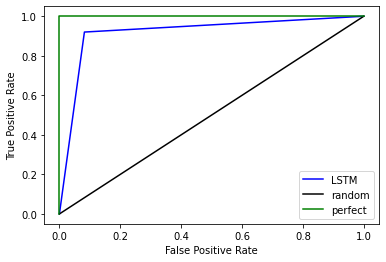

In [111]:
import matplotlib.pyplot as plt

plt.plot(fpr_LSTM,tpr_LSTM,'b-', label= 'LSTM')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [112]:
from sklearn.metrics import roc_auc_score
auc_LSTM = roc_auc_score(y1_test, y1_pred)

print('AUC LSTM:%.3f'% auc_LSTM)

AUC LSTM:0.919


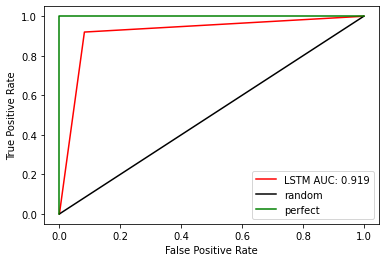

In [113]:
import matplotlib.pyplot as plt
plt.plot(fpr_LSTM, tpr_LSTM,'r-',label = 'LSTM AUC: %.3f'%auc_LSTM)

plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:
%%time
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y1_pred)

CPU times: user 5.3 ms, sys: 252 µs, total: 5.55 ms
Wall time: 3.98 ms


0.9188069594034797

In [115]:
%%time
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3434
           1       0.89      0.92      0.91      2601

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035

CPU times: user 38 ms, sys: 6.78 ms, total: 44.7 ms
Wall time: 42.3 ms


# traitement avec countVectorizer 

In [3]:
df2=pd.read_csv('/home/toshiba/Bureau/train/train.csv')

In [117]:
df2.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [118]:
X2=df2.drop('label',axis=1)
X2.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [119]:
y2=df2['label']
y2.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [120]:
df2.shape

(20800, 5)

In [121]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [122]:
df2=df2.dropna()
df2.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [123]:
messages=df2.copy()

In [124]:
messages.reset_index(inplace=True)

In [125]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [126]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [127]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,6))
X2 = cv.fit_transform(corpus).toarray()

In [130]:
X2.shape

(18285, 5000)

In [131]:
y2=messages['label']

In [132]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=0)

In [133]:
cv.get_feature_names()

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'abus new york time',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'acquit',
 'acquitt',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'act new york time',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advis new york time',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afford care',
 'afford care act',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new yo

In [134]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 6),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [135]:
count_d2 = pd.DataFrame(X2_train, columns=cv.get_feature_names())

In [136]:
count_d2.head(5)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zika,zika viru,zionist,zone,zone new,zone new york,zone new york time,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
import matplotlib.pyplot as plt

In [138]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [139]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [140]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


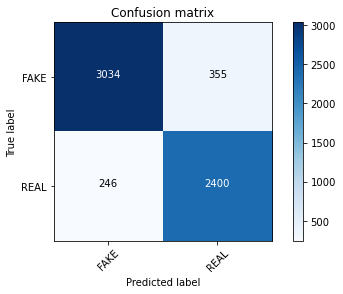

In [141]:
classifier.fit(X2_train, y2_train)
pred = classifier.predict(X2_test)
score = metrics.accuracy_score(y2_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y2_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y2_test,pred)

array([[3034,  355],
       [ 246, 2400]])

In [143]:
from sklearn.metrics import roc_curve
fpr_LSTM, tpr_LSTM, thresholds_LSTM = roc_curve(y1_test, y1_pred)
fpr_CV, tpr_CV, thresholds_CV = roc_curve(y2_test, pred)

In [144]:
thresholds_LSTM

array([2, 1, 0], dtype=int32)

In [145]:
tpr_LSTM

array([0.        , 0.92003076, 1.        ])

In [146]:
fpr_LSTM

array([0.        , 0.08211998, 1.        ])

In [147]:
thresholds_CV

array([2, 1, 0])

In [148]:
tpr_CV

array([0.        , 0.90702948, 1.        ])

In [149]:
fpr_CV

array([0.        , 0.10475066, 1.        ])

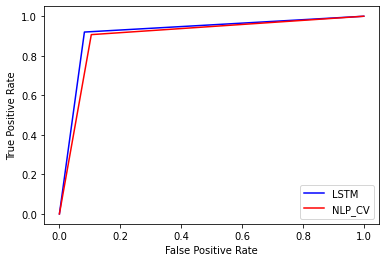

In [150]:
import matplotlib.pyplot as plt
plt.plot(fpr_LSTM,tpr_LSTM,'b-', label= 'LSTM')
plt.plot(fpr_CV, tpr_CV,'r-',label = 'NLP_CV')
#plt.plot([0,1],[0,1],'k-',label='random')
#plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [151]:
from sklearn.metrics import roc_auc_score
auc_CV = roc_auc_score(y2_test, pred)
auc_LSTM = roc_auc_score(y1_test, y1_pred)

print('AUC LSTM:%.3f'% auc_LSTM)
print('AUC CV:%.3f'% auc_CV)

AUC LSTM:0.919
AUC CV:0.901


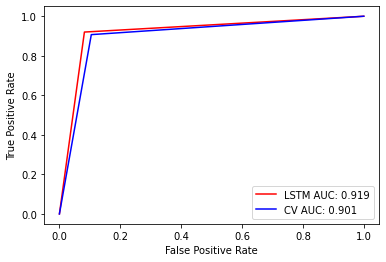

In [152]:
plt.plot(fpr_LSTM, tpr_LSTM,'r-',label = 'LSTM AUC: %.3f'%auc_LSTM)
plt.plot(fpr_CV, tpr_CV,'b-',label = 'CV AUC: %.3f'%auc_CV)
#plt.plot([0,1],[0,1],'k-',label='random')
#plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()